# 단일 회귀 선형 모델
- linear regression : 회귀 예측을 위한 선형 모델을 생성하는 알고리즘, 직전의 방정식을 이용한 손실함수
- logistic regression : 이진 분류를 위한 선형 모델을 생성하는 알고리즘, S자 곡선을 표현하는 손실함수(sigmoid 함수)
- softmax regression : 다중 클래스 분류를 위한 선형 모델을 생성하는 알고리즘

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# matplotlib 한글 폰트 오류 문제 해결 - windows
from matplotlib import font_manager, rc
font_path = "C:\\Windows\\Fonts\\malgun.ttf" # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )

# matplotlib 한글 폰트 오류 문제 해결 - mac 
#from matplotlib import rc
#rc( 'font', family = 'AppleGothic' )

# IPython 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option( 'display.max_columns', 20 ) # 출력할 열의 개수 한도
pd.set_option( 'display.max_colwidth', 20 ) # 출력할 열의 너비
pd.set_option( 'display.unicode.east_asian_width', True ) # 유니코드 사용 너비 조정

import warnings
warnings.filterwarnings('ignore')

## 데이터 준비

In [2]:
df = pd.read_csv('data/auto-mpg-title.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevel...
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# 연비 예측 모델

## 데이터 탐색

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   accelaration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,accelaration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [6]:
df['horsepower'].replace('?', np.nan, inplace =True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 속성 선택

In [8]:
ndf = df[['mpg', 'cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


<AxesSubplot:xlabel='weight', ylabel='mpg'>

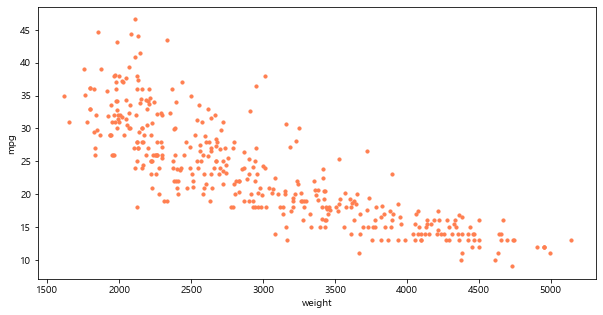

In [9]:
ndf.plot(kind='scatter', x='weight', y='mpg', color='coral',
        s=10, figsize=(10,5))

<AxesSubplot:xlabel='weight', ylabel='mpg'>

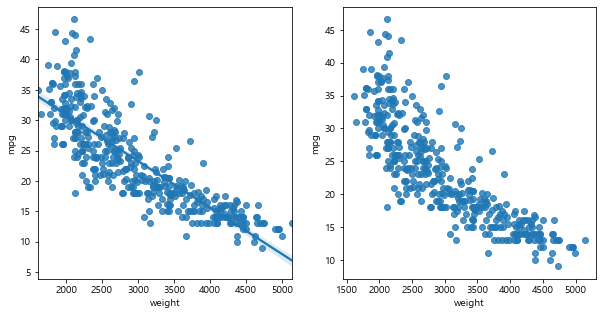

In [10]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax= ax1)
sns.regplot(x = 'weight', y = 'mpg', data = ndf, ax= ax2, fit_reg = False)

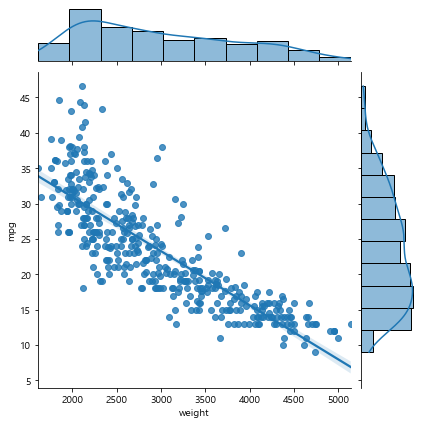

In [11]:
sns.jointplot(x = 'weight', y = 'mpg', kind ='reg', data = ndf)

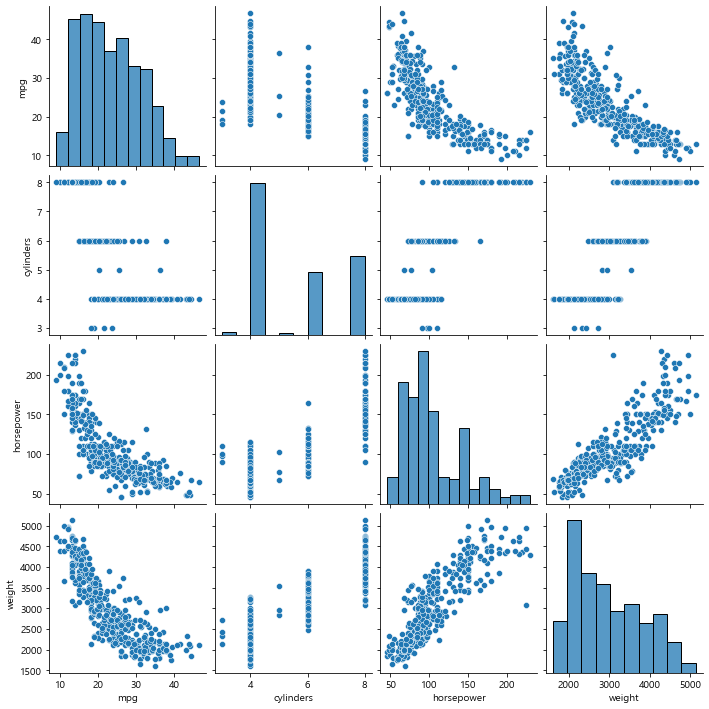

In [12]:
sns.pairplot(ndf)

In [13]:
ndf.corr()

,mpg,cylinders,horsepower,weight
mpg,1.000000,-0.777618,-0.778427,-0.832244
cylinders,-0.777618,1.000000,0.842983,0.897527
horsepower,-0.778427,0.842983,1.000000,0.864538
weight,-0.832244,0.897527,0.864538,1.000000


## 데이터 세트 분리

In [14]:
X = ndf[['weight']] # 입력 데이터
y = ndf[['mpg']] # 정답 데이터

In [15]:
print(f'X shape : {X.shape}\ny shape : {y.shape}')

X shape : (392, 1)
y shape : (392, 1)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f'X_train shape : {X_train.shape}\tX_test : {X_test.shape}')
print(f'y_train shape : {y_train.shape}\ty_test : {y_test.shape}')

X_train shape : (313, 1)	X_test : (79, 1)
y_train shape : (313, 1)	y_test : (79, 1)


## 단일 선형 회귀 모델 생성

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression() # Linear Regression 객체 생성
lr.fit(X_train, y_train) # 학습

LinearRegression()

In [20]:
print(f'연비 예측 단순 선형 회귀 모델 결정 계수(R-제곱) : {lr.score(X_test, y_test)}')

연비 예측 단순 선형 회귀 모델 결정 계수(R-제곱) : 0.6533466675646018


In [21]:
print(f'기울기 W : {lr.coef_}')
print(f'절  편 b : {lr.intercept_}')

기울기 W : [[-0.00790361]]
절  편 b : [47.20052643]


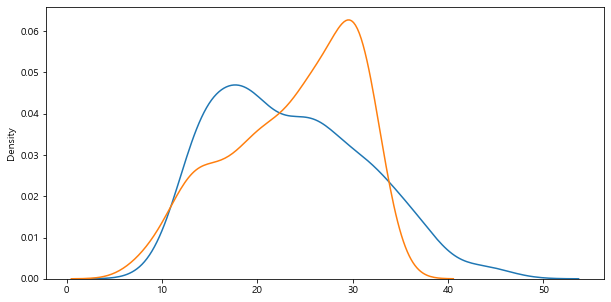

In [22]:
# 실제값과 예측값에 대한 시각화
y_hat = lr.predict(X) # 실제값에 대한 예측값

plt.figure(figsize = (10,5))
ax1 = sns.distplot(y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat', ax=ax1)

## 다항 회귀(polynomial Regression) 를 이용한 단순 회귀 모델 생성

In [23]:
from sklearn.preprocessing import PolynomialFeatures # 다항식변환

In [24]:
poly = PolynomialFeatures(degree = 2) # 2차항 적용 선택
X_train_poly = poly.fit_transform(X_train) # 2차항으로 변환

print(f'원본 데이터 : {X_train.shape}')
print(f'2차항 변환 데이터 : {X_train_poly.shape}')

원본 데이터 : (313, 1)
2차항 변환 데이터 : (313, 3)


In [25]:
#  다항 회귀 모델 생성
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression()

In [26]:
X_test_poly = poly.fit_transform(X_test)
print(f'다항 회귀 모델 결정 계수 : {pr.score(X_test_poly, y_test)}')

다항 회귀 모델 결정 계수 : 0.6730234425886985


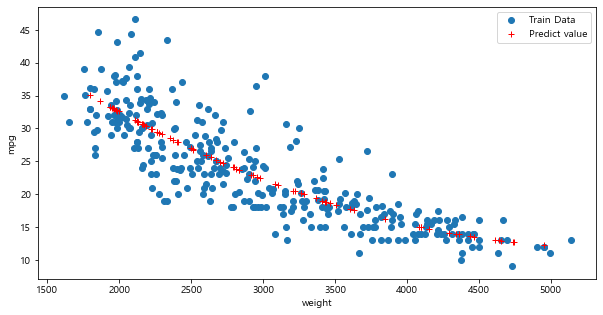

In [33]:
# 다항 회귀선 시각화
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label = 'Train Data')
ax.plot(X_test, y_hat_test, 'r+', label = 'Predict value')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')

plt.show()

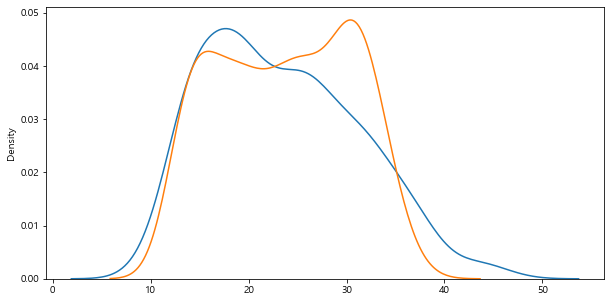

In [28]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y, hist=False, label ='y')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat', ax =ax1)

## 다중 선형 회귀(Multivariate Regression) 모델 생성

## 다중 속성 선택

In [ ]:
X = ndf[['cylinders', 'horsepower', 'weight']]
y = ndf[['mpg']]

print(f'훈련 데이터 세트 : {X.shape}')
print(f'정답 데이터 세트 : {y.shape}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f'X_train shape : {X_train.shape}\tX_test : {X_test.shape}')
print(f'y_train shape : {y_train.shape}\ty_test : {y_test.shape}')

## 다중 선형 회귀 모델 생성

In [ ]:
lr = LinearRegression ()
lr.fit(X_train, y_train)

In [ ]:
print(f'다중 선형 회귀 모델 결정 계수 : {lr.score(X_test, y_test)}')
print(f'기울기 W : {lr.coef_}')
print(f'절  편 b : {lr.intercept_}')

In [ ]:
y_hat = lr.predict(X_test)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y, hist = False, label ='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax= ax1)